In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Question 3
From the numbers dataset in the subdirectory get each image. each image is the image of numbers 1 to 5 and it contains 16*16 small images. <br>
Get each images and make an array of datas. use the KNN algorithm and bayes classifier in questions 1 and 2 to classify the images. Use Half of the data for training and other half for test data. use 10 precent of training data for validation set to calculate the part b of question 1 for images. 

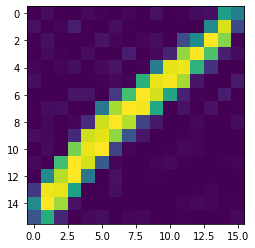

In [2]:
## get one image see how the code works
number1 = plt.imread('../numbers dataset/usps_1.jpg')
image1 = number1[0:16,0:16]
plt.imshow(image1)
plt.show()

In [3]:
## open all images file 
img_numbers1 = plt.imread('../numbers dataset/usps_1.jpg')
img_numbers2 = plt.imread('../numbers dataset/usps_2.jpg')
img_numbers3 = plt.imread('../numbers dataset/usps_3.jpg')
img_numbers4 = plt.imread('../numbers dataset/usps_4.jpg')
img_numbers5 = plt.imread('../numbers dataset/usps_5.jpg')

## iterate over each images and get the valus of them
images_arr = [img_numbers1, img_numbers2, img_numbers3, img_numbers4, img_numbers5]

## each image is 16 by 16 pixels
IMAGE_SIZE_X = 16
IMAGE_SIZE_Y = 16

## feature space size is the multiplication of width and height
FEATURE_SPACE_SIZE = IMAGE_SIZE_X * IMAGE_SIZE_Y

## create pandas columns
cols = []
for i in range(0, FEATURE_SPACE_SIZE):
    cols.append(f"feature_{i}")
## there must be a label for each image
cols.append('label')


In [4]:
dataset_df = pd.DataFrame(columns=cols)

images = []
## each label for hand writed images is the index of the array
for label, image in enumerate(images_arr):
    images.append([])
    ## x of each image
    ## iterate over image columns
    for y_idx in np.arange(0, image.shape[1] - IMAGE_SIZE_Y + 1, IMAGE_SIZE_Y):
        ## iterate over image rows
        for x_idx in np.arange(0, image.shape[0] - IMAGE_SIZE_X + 1, IMAGE_SIZE_X):
            ## add images using the labels
            img = np.array(image[x_idx: x_idx + IMAGE_SIZE_X, y_idx: y_idx + IMAGE_SIZE_Y])
            images[label].append( img )

            df = pd.DataFrame(columns=cols)
            img = img.flatten()
            img = np.append(img, label) 
            img_series = pd.Series(img, index=cols)
            df = df.append(img_series, ignore_index=True)
 
            dataset_df = dataset_df.append(df, ignore_index=True)    



In [5]:
## save the images dataset into a csv file
dataset_df.to_csv('usps_images.csv', index=False)

Now we can see each images saved in arrays

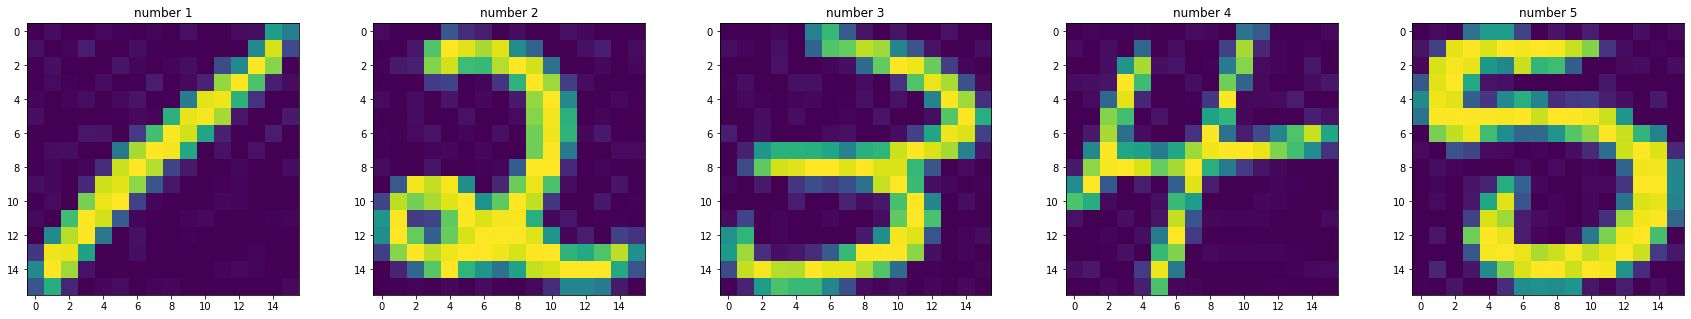

In [6]:
fig, axes = plt.subplots(1,5, figsize=(30,5))
axes[0].imshow(images[0][0])
axes[0].set_title('number 1')

axes[1].imshow(images[1][0])
axes[1].set_title('number 2')

axes[2].imshow(images[2][0])
axes[2].set_title('number 3')

axes[3].imshow(images[3][0])
axes[3].set_title('number 4')

axes[4].imshow(images[4][0])
axes[4].set_title('number 5')

plt.show()


In [7]:
dataset_df = pd.read_csv('usps_images.csv')

## if we have, remove the impractical columns 
if any(np.array(dataset_df.columns) == 'Unnamed: 0'):
    del dataset_df['Unnamed: 0']
if any(np.array(dataset_df.columns) == 'index'):
    del dataset_df['index']

dataset_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,label
0,0,8,0,0,6,2,0,4,0,11,...,4,5,0,0,1,0,0,0,6,0
1,0,0,9,0,4,0,6,6,0,10,...,4,8,0,0,9,0,4,8,0,0
2,1,0,0,0,0,2,4,4,0,5,...,4,9,0,0,2,0,0,0,1,0
3,0,0,0,0,3,4,2,0,0,4,...,9,6,0,5,1,0,0,0,5,0
4,0,3,0,0,9,0,5,2,1,0,...,0,0,2,4,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [8]:
## split all data into half
##  training and test data

def divide_dataframe(dataset, validation_split, label_string):
    """
    Divide a pandas dataframe into two dataframes

    INPUTS:
    ---------
    dataset:  the pandas dataframe that is going to be splited
    validation_split:  the partition of how the validation set will be, example: 0.1
    label:  For a multiclass classification, we need the label to get sample from each label (Must be an string)

    OUTPUTS:
    ---------
    train_set:  pandas dataframe, the partition of training set
    valid_set:  pandas dataframe, the partition of validation set  
    """

    assert ((validation_split >0) & (validation_split < 1)), "[ERROR] validation_split must be between 0 and 1!"
    columns = dataset.columns
    train_images = pd.DataFrame(columns=columns)
    validation_images = pd.DataFrame(columns=columns)

    ## get all labels for training and test data
    for label in dataset[label_string].unique():
        ## get the dataset for each dataset label
        dataset_label = dataset[dataset[label_string] == label]
        length = int(len(dataset_label) * validation_split)

        train_images = train_images.append(dataset_label.iloc[: length], ignore_index=True)
        validation_images = validation_images.append(dataset_label.iloc[length: ], ignore_index=True)

    features = columns[:len(columns) - 1]

    ## normalize the values into float
    ## we need to convert the integer values to float for KNN function
    for col in features:
        train_images[col] = pd.to_numeric(train_images[col], downcast='float')
        validation_images[col] = pd.to_numeric(validation_images[col], downcast='float')

    return train_images, validation_images

train_images, test_images = divide_dataframe(dataset_df, 0.5,'label')

print(train_images.shape)
print(test_images.shape)


(2805, 257)
(2805, 257)


In [9]:
############################# check labels of the classified data #############################
def check_accuracy(actual_labels, target_labels):
    """
    check the accuracy of the result of a classification problem
    
    INPUTS:
    -----------
    actual_labels:  are the labels that the classifier gave us
    target_labels:  are the correct labels of the data
    
    OUTPUT:
    -----------
    accuracy:  an array pandas dataframe containing the accuracy for each data
    """

    ## convert to numpy arrays to compute the equality of each elemnts
    a_labels = np.array(actual_labels)
    t_labels = np.array(target_labels)


    ## check the input values
    assert a_labels.shape == t_labels.shape, f"[ERROR] Inputs must have the same shape! the input shape is {actual_labels.shape} != {t_labels.shape}!"
    
    ## mark as True the eqaul labels
    accuracy = (a_labels == t_labels).sum() * 100 / len(target_labels)
    
    
    return accuracy
    

############################# DECIDE THE CLASSIFICATION RESULTS #############################
def vote_nearest_neighbor(unique_labels, classified_labels):
    """
    find the most nearest point using the classified_labels array
    Note that our labels are in integer format

    INPUTS:
    ---------
    classified_labels:  array of integer values, the labels that are classified for a data
    unique_labels:  array of integer values, the labels that are unique 

    OUTPUT:
    --------
    nearest_label:  the nearest class of label
    """

    classified_labels = np.array(classified_labels)

    ## occurance of each label
    occurances = []
    for l in unique_labels:
        occure = (classified_labels == l).sum()
        occurances.append( occure )
    
    
    ## return the index of max value meaning the label of the most occured value
    return np.where(np.max(occurances) == occurances)[0][0]

############################# PERFORM KNN ALGORITHM  #############################
def KNN(K, train_data, test_data, features, threshold = 0.5):
    """
    The K nearest neighbor algorithm
    
    INPUTS:
    -----------
    K:  is the KNN algorithm parameter (a positive integer value)
    train_data, test_data:  in the format of pandas dataframe, the algorithm's food!
    features:  are the feature for each data, Note that the output label must be omited!
    threshold:  is the value to decide the result of KNN algorithm
    
    OUTPUT:
    -----------
    classified_data:  showing the classifier results
    """
        
    ## get the algorithm start time
    start_time = time.time_ns()
    
    assert K > 0, 'K must be a positive value and also not zero!'

    test_label_votes = []
    
    ## start the test phase
    for index in range(0, len(test_data)):

        d = 0
        for feature in features:
            d += (train_data[feature]- test_data.iloc[index][feature]) ** 2
        d = np.sqrt(d)

        ## the index of K nearest neighbor points
        nearest_indexes = d.sort_values()[:K].index
                
        ## get the labels of nearest data
        labels = train_data.iloc[nearest_indexes].label
        
        
        ## find the nearest neigbor
        vote = vote_nearest_neighbor(np.unique(test_data.label), labels)
        test_label_votes.append(vote)
        
    ## decide the voting process in KNN
    # classified_data = reform_data(test_label_votes, threshold)

    finish_time = time.time_ns()
    print('Finished! K=%s algorithm time: ' % K, ((finish_time - start_time) / 1000), ' miliseconds')
        
    return test_label_votes


In [10]:
############# Perform KNN algorithm for 10% of data as test #############
results = []
K_arr = [1, 2, 5, 10, 15, 20, 50, 100, 500]

## the last of the columns is the label 
features = cols[:len(cols) - 1]

# for k_value in K_arr:
for k_value in K_arr:
    result = KNN(k_value, train_images, test_images, features)
    results.append(result)


Finished! K=1 algorithm time:  323759035.677  miliseconds
Finished! K=2 algorithm time:  342315575.521  miliseconds
Finished! K=5 algorithm time:  340973554.938  miliseconds
Finished! K=10 algorithm time:  337321681.84  miliseconds
Finished! K=15 algorithm time:  335802442.355  miliseconds
Finished! K=20 algorithm time:  335984222.796  miliseconds
Finished! K=50 algorithm time:  337429777.204  miliseconds
Finished! K=100 algorithm time:  340131246.999  miliseconds
Finished! K=500 algorithm time:  341013819.476  miliseconds


In [11]:
################ Save the results in a csv file ################
df_knn_accuracy = pd.DataFrame(columns=["K", "accuracy"])
for idx in range(0, len(results)):
    acc = check_accuracy(results[idx], test_images.label)

    df = pd.DataFrame(data = {"K": [K_arr[idx]], "accuracy": [acc]})
    
    ## append the result to the all results dataframe
    df_knn_accuracy = df_knn_accuracy.append(df, ignore_index=True)

df_knn_accuracy.to_csv('Result-Image-KNN.csv', index=False)
df_knn_accuracy

,K,accuracy
0,1,94.010695
1,2,92.798574
2,5,93.440285
3,10,92.584670
4,15,92.299465
5,20,91.586453
6,50,89.447415
7,100,87.237077
8,500,77.860963


Now we are going to use validation dataset to 10% of training set


In [12]:
############# Start again using 10% of train as validation dataset #############
valid_img_ds , train_img_ds = divide_dataframe(train_images, 0.1, 'label') 

print("validation set shape: ", valid_img_ds.shape)
print("new training set shape: ",train_img_ds.shape)

validation set shape:  (280, 257)
new training set shape:  (2525, 257)


In [15]:
features = cols[:len(cols) - 1]
ten_precent_results = []
K_arr = [1, 2, 5, 10, 15, 20, 50, 100, 500]

## the last of the columns is the label 
features = cols[:len(cols) - 1]

# for k_value in K_arr:
for k_value in K_arr:
    result = KNN(k_value, train_img_ds, valid_img_ds, features)
    ten_precent_results.append(result)

Finished! K=1 algorithm time:  25400657.48  miliseconds
Finished! K=2 algorithm time:  24468349.622  miliseconds
Finished! K=5 algorithm time:  24148772.001  miliseconds
Finished! K=10 algorithm time:  24320405.379  miliseconds
Finished! K=15 algorithm time:  24765571.936  miliseconds
Finished! K=20 algorithm time:  24580799.225  miliseconds
Finished! K=50 algorithm time:  24652709.683  miliseconds
Finished! K=100 algorithm time:  24568862.56  miliseconds
Finished! K=500 algorithm time:  24646776.727  miliseconds


In [16]:
################ Save the results in a csv file ################
df_ten_precent_knn_accuracy = pd.DataFrame(columns=["K", "accuracy"])
for idx in range(0, len(results)):
    acc = check_accuracy(results[idx], test_images.label)

    df = pd.DataFrame(data = {"K": [K_arr[idx]], "accuracy": [acc]})
    
    ## append the result to the all results dataframe
    df_ten_precent_knn_accuracy = df_ten_precent_knn_accuracy.append(df, ignore_index=True)

df_ten_precent_knn_accuracy.to_csv('Result-Image-KNN-validation10-precent.csv', index=False)
df_ten_precent_knn_accuracy

,K,accuracy
0,1,94.010695
1,2,92.798574
2,5,93.440285
3,10,92.584670
4,15,92.299465
5,20,91.586453
6,50,89.447415
7,100,87.237077
8,500,77.860963
